## Operar sobre tiempos

In [1]:
#librerias
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# cargar datos
datos = pd.read_csv('./data/ArtJan2018resumido.csv')
df = pd.DataFrame(datos)

In [3]:
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5a7101c110f40f00018be961,1322,By SHANNON SIMS,article,"Rhythm of the Streets: ‘We’re Warrior Women, a...","['Bahia (Brazil)', 'Music', 'Women and Girls',...",68,Travel,5,01/30/18 11:37 PM,Unknown,Meet the all-female Brazilian drum group that ...,The New York Times,News,https://www.nytimes.com/2018/01/30/travel/braz...
1,5a70fc1210f40f00018be950,1308,By ALAN RAPPEPORT and THOMAS KAPLAN,article,"As Deficit Grows, Congress Keeps Spending","['United States Politics and Government', 'Fed...",68,Washington,17,01/30/18 11:13 PM,Politics,Treasury Secretary Steven Mnuchin urged Congre...,The New York Times,News,https://www.nytimes.com/2018/01/30/us/politics...
2,5a70f8f810f40f00018be943,228,By JANE LANG,article,Lesson in Select Bus Service,"['Buses', 'Pennsylvania Station (Manhattan, NY...",0,Metro,16,01/30/18 11:00 PM,Unknown,A woman finds out what happens when you don’t ...,The New York Times,News,https://www.nytimes.com/2018/01/30/nyregion/me...
3,5a70eb8110f40f00018be925,1114,By THE EDITORIAL BOARD,article,Here’s the Real State of the Union,"['State of the Union Message (US)', 'Trump, Do...",61,Editorial,24,01/30/18 10:02 PM,Editorials,The reaction against his authoritarian impulse...,The New York Times,Editorial,https://www.nytimes.com/2018/01/30/opinion/edi...
4,5a70d1d210f40f00018be8d9,777,By BERT STRATTON,article,Good Riddance to Chief Wahoo,"['Baseball', 'Cleveland Indians', 'Western Res...",68,OpEd,0,01/30/18 08:13 PM,Unknown,"I’ve lived in Cleveland all my life, and I’m g...",The New York Times,Op-Ed,https://www.nytimes.com/2018/01/30/opinion/chi...


### Extraer la fecha en una nueva columna

In [4]:
# expand = True devuelve una columna por grupo de captura
df['Date'] = df['pubDate'].str.extract('(../../..)', expand = True)
df['Date']

0     01/30/18
1     01/30/18
2     01/30/18
3     01/30/18
4     01/30/18
5     01/30/18
6     01/30/18
7     01/30/18
8     01/30/18
9     01/30/18
10    01/30/18
11    01/30/18
12    01/30/18
13    01/30/18
14    01/30/18
15    01/30/18
16    01/30/18
17    01/30/18
18    01/30/18
Name: Date, dtype: object

### tomar la hora de una columna y graficar con otra variable

In [5]:
# cargar datos
datos = pd.read_csv('./data/Ejemplo.csv')
df = pd.DataFrame(datos)
df.head()

,valor 1,valor 2,valor 3,hora 1,fecha
0,123,415,614,12:20:00,Monday 03.04.2018 – 15:29:01
1,431,422,613,14:10:00,Monday 03.04.2018 – 15:29:02
2,332,321,612,11:01:00,Monday 03.04.2018 – 15:29:03
3,534,444,614,10:00:00,Monday 03.04.2018 – 15:30:01
4,553,543,614,14:00:00,Monday 03.04.2018 – 15:31:01


In [6]:
# Extraer hora
df['hora'] = df['fecha'].str.extract('(..:..:..)', expand = True)
df['hora']

0    15:29:01
1    15:29:02
2    15:29:03
3    15:30:01
4    15:31:01
5    15:33:01
Name: hora, dtype: object

In [7]:
df

,valor 1,valor 2,valor 3,hora 1,fecha,hora
0,123,415,614,12:20:00,Monday 03.04.2018 – 15:29:01,15:29:01
1,431,422,613,14:10:00,Monday 03.04.2018 – 15:29:02,15:29:02
2,332,321,612,11:01:00,Monday 03.04.2018 – 15:29:03,15:29:03
3,534,444,614,10:00:00,Monday 03.04.2018 – 15:30:01,15:30:01
4,553,543,614,14:00:00,Monday 03.04.2018 – 15:31:01,15:31:01
5,324,234,615,12:00:00,Monday 03.04.2018 – 15:33:01,15:33:01


### Convertir hora en objeto tipo datetime

In [8]:
df['hora'] = pd.to_datetime(df['hora'])
df['hora 1'] = pd.to_datetime(df['hora 1'])

### Restar horas y guardar en una nueva columna

In [9]:
df['diferencia'] = df['hora'] - df['hora 1']
df['diferencia']


0   0 days 03:09:01
1   0 days 01:19:02
2   0 days 04:28:03
3   0 days 05:30:01
4   0 days 01:31:01
5   0 days 03:33:01
Name: diferencia, dtype: timedelta64[ns]

In [13]:
df['diferencia'] = df['diferencia'].astype(str)
df

,valor 1,valor 2,valor 3,hora 1,fecha,hora,diferencia
0,123,415,614,2022-12-03 12:20:00,Monday 03.04.2018 – 15:29:01,2022-12-03 15:29:01,0 days 03:09:01
1,431,422,613,2022-12-03 14:10:00,Monday 03.04.2018 – 15:29:02,2022-12-03 15:29:02,0 days 01:19:02
2,332,321,612,2022-12-03 11:01:00,Monday 03.04.2018 – 15:29:03,2022-12-03 15:29:03,0 days 04:28:03
3,534,444,614,2022-12-03 10:00:00,Monday 03.04.2018 – 15:30:01,2022-12-03 15:30:01,0 days 05:30:01
4,553,543,614,2022-12-03 14:00:00,Monday 03.04.2018 – 15:31:01,2022-12-03 15:31:01,0 days 01:31:01
5,324,234,615,2022-12-03 12:00:00,Monday 03.04.2018 – 15:33:01,2022-12-03 15:33:01,0 days 03:33:01


In [15]:
# extraer hora de la columna diferencia
df['diferencia_hora'] = df['diferencia'].str.extract('(..:..:..)', expand=True)
df

,valor 1,valor 2,valor 3,hora 1,fecha,hora,diferencia,diferencia_hora
0,123,415,614,2022-12-03 12:20:00,Monday 03.04.2018 – 15:29:01,2022-12-03 15:29:01,0 days 03:09:01,03:09:01
1,431,422,613,2022-12-03 14:10:00,Monday 03.04.2018 – 15:29:02,2022-12-03 15:29:02,0 days 01:19:02,01:19:02
2,332,321,612,2022-12-03 11:01:00,Monday 03.04.2018 – 15:29:03,2022-12-03 15:29:03,0 days 04:28:03,04:28:03
3,534,444,614,2022-12-03 10:00:00,Monday 03.04.2018 – 15:30:01,2022-12-03 15:30:01,0 days 05:30:01,05:30:01
4,553,543,614,2022-12-03 14:00:00,Monday 03.04.2018 – 15:31:01,2022-12-03 15:31:01,0 days 01:31:01,01:31:01
5,324,234,615,2022-12-03 12:00:00,Monday 03.04.2018 – 15:33:01,2022-12-03 15:33:01,0 days 03:33:01,03:33:01


### Eliminar columna diferencia

In [17]:
df.drop(['diferencia'], axis=1)

,valor 1,valor 2,valor 3,hora 1,fecha,hora,diferencia_hora
0,123,415,614,2022-12-03 12:20:00,Monday 03.04.2018 – 15:29:01,2022-12-03 15:29:01,03:09:01
1,431,422,613,2022-12-03 14:10:00,Monday 03.04.2018 – 15:29:02,2022-12-03 15:29:02,01:19:02
2,332,321,612,2022-12-03 11:01:00,Monday 03.04.2018 – 15:29:03,2022-12-03 15:29:03,04:28:03
3,534,444,614,2022-12-03 10:00:00,Monday 03.04.2018 – 15:30:01,2022-12-03 15:30:01,05:30:01
4,553,543,614,2022-12-03 14:00:00,Monday 03.04.2018 – 15:31:01,2022-12-03 15:31:01,01:31:01
5,324,234,615,2022-12-03 12:00:00,Monday 03.04.2018 – 15:33:01,2022-12-03 15:33:01,03:33:01


### Graficar columnas hora con valor 2 

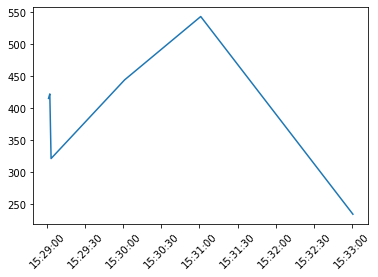

In [11]:
plt.plot(df['hora'], df['valor 2'], '-')
plt.xticks(rotation = 45)
plt.show()

### Graficar Hora con valor 3

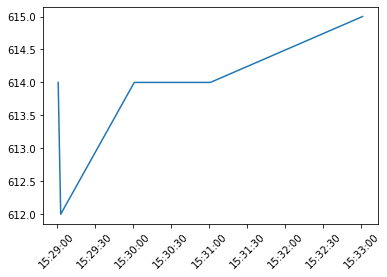

In [18]:
plt.plot(df['hora'], df['valor 3'], '-')
plt.xticks(rotation= 45)
plt.show()